# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

### ipython magic to plot in a notebook

In [3]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [4]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [5]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [6]:
k = f.readlines()

In [7]:
r = k[0].split(',')

In [8]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [9]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [10]:
df = pd.DataFrame(testlist)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,"{""deals"":[{""deal"":{""id"":""16777""","""benchmarks"":{""values"":[3373",1383,4,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""44459017767035478""","""totalPayout"":""267114975366262273""","""lastBillTS"":""2018-10-04T23:32:09Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
1,"{""deal"":{""id"":""16776""","""benchmarks"":{""values"":[1684",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""7419815870199531""","""totalPayout"":""44478384653098882""","""lastBillTS"":""2018-10-04T23:29:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
2,"{""deal"":{""id"":""16578""","""benchmarks"":{""values"":[510",1753,8,512000000,67108864,1000001,1000000,2,8512339968,...,"""status"":1","""blockedBalance"":""830582535668209187""","""totalPayout"":""9088207025969330806""","""lastBillTS"":""2018-10-04T23:29:18Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
3,"{""deal"":{""id"":""16775""","""benchmarks"":{""values"":[846",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""3709907935099765""","""totalPayout"":""22239192326549439""","""lastBillTS"":""2018-10-04T23:29:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
4,"{""deal"":{""id"":""16577""","""benchmarks"":{""values"":[9701",1753,8,64000000,150000000,1000001,1000000,0,0,...,"""status"":1","""blockedBalance"":""72032265026259392""","""totalPayout"":""789881244687655452""","""lastBillTS"":""2018-10-04T23:28:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None


In [13]:
f.close()

In [14]:
del k

In [15]:
del r

## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [16]:
df[15]

0      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
1      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
2      "consumerID":"0x5D2c0CF8ec8C2d10Cda338f2d59893...
3      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
4      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
5      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
6      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
7      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
8      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
9      "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
10     "consumerID":"0x5D2c0CF8ec8C2d10Cda338f2d59893...
11     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
12     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
13     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
14     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
15     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
16     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
17     "consumerID":"0x4C5BAf6F

### Make a little funtion to trim unnecessary charactors

In [17]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [18]:
df['consumer_ID'] = df[15].apply(Supplier_ID_conversion)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""16777""","""benchmarks"":{""values"":[3373",1383,4,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""44459017767035478""","""totalPayout"":""267114975366262273""","""lastBillTS"":""2018-10-04T23:32:09Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
1,"{""deal"":{""id"":""16776""","""benchmarks"":{""values"":[1684",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""7419815870199531""","""totalPayout"":""44478384653098882""","""lastBillTS"":""2018-10-04T23:29:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
2,"{""deal"":{""id"":""16578""","""benchmarks"":{""values"":[510",1753,8,512000000,67108864,1000001,1000000,2,8512339968,...,"""blockedBalance"":""830582535668209187""","""totalPayout"":""9088207025969330806""","""lastBillTS"":""2018-10-04T23:29:18Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5
3,"{""deal"":{""id"":""16775""","""benchmarks"":{""values"":[846",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""3709907935099765""","""totalPayout"":""22239192326549439""","""lastBillTS"":""2018-10-04T23:29:15Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
4,"{""deal"":{""id"":""16577""","""benchmarks"":{""values"":[9701",1753,8,64000000,150000000,1000001,1000000,0,0,...,"""blockedBalance"":""72032265026259392""","""totalPayout"":""789881244687655452""","""lastBillTS"":""2018-10-04T23:28:57Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [20]:
df[14]

0      "supplierID":"0xA0603b9060Cbd577C058e25a7b6C8e...
1      "supplierID":"0xDd36339dC41E75A014239BE7C5A822...
2      "supplierID":"0x3e55239FE9FABD62D6c9e83156ac0a...
3      "supplierID":"0xDd36339dC41E75A014239BE7C5A822...
4      "supplierID":"0x3e55239FE9FABD62D6c9e83156ac0a...
5      "supplierID":"0xDd36339dC41E75A014239BE7C5A822...
6      "supplierID":"0x38d1Ba3BadE30B5d2B52E8b2A5DBdc...
7      "supplierID":"0x35F09Ab27Eea605e2c76ed57Bc103b...
8      "supplierID":"0x38d1Ba3BadE30B5d2B52E8b2A5DBdc...
9      "supplierID":"0x491028A2510F1f9f10650272f780f2...
10     "supplierID":"0x38d1Ba3BadE30B5d2B52E8b2A5DBdc...
11     "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
12     "supplierID":"0x6ec9f62a5e9880Ecd84cd03C30499D...
13     "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
14     "supplierID":"0xc62DA1C2c5ebbB933286cE698c0724...
15     "supplierID":"0x1A46613006bCACCA13b27B3b317edA...
16     "supplierID":"0x10B3Fe7B225b9fF0294CAa76d5d9F8...
17     "supplierID":"0x491028A2

In [21]:
df['supplier_ID'] = df[14].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [22]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [23]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [24]:
df[19]

0        "price":"672567634080"
1        "price":"112094605680"
2      "price":"12477100000000"
3         "price":"56047302840"
4       "price":"1085000418420"
5        "price":"168141908520"
6         "price":"56643421860"
7       "price":"3780103000000"
8        "price":"113286843720"
9        "price":"287180918200"
10     "price":"36314090000000"
11       "price":"333270251100"
12        "price":"55545041850"
13      "price":"5073616000000"
14        "price":"57105285180"
15      "price":"4342786500000"
16     "price":"45005460833333"
17       "price":"342631711080"
18        "price":"57105285180"
19       "price":"224189211360"
20       "price":"112094605680"
21     "price":"30273240000000"
22       "price":"279027168750"
23       "price":"223221735000"
24       "price":"112420621320"
25       "price":"111610867500"
26       "price":"167416301250"
27       "price":"389297778170"
28       "price":"279027168750"
29       "price":"166635125550"
                 ...           
90     "

In [25]:
df['price_USD/h'] = df[19].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [26]:
df[10]

0              0
1              0
2       53305000
3              0
4              0
5              0
6              0
7       17503000
8              0
9              0
10     147094000
11             0
12             0
13      23014000
14             0
15      19806000
16     186366000
17             0
18             0
19             0
20             0
21     122390000
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
         ...    
90     186283000
91             0
92             0
93             0
94             0
95             0
96             0
97             0
98             0
99      53509000
100    149731000
101            0
102            0
103            0
104     43376000
105            0
106            0
107            0
108     44702000
109            0
110            0
111            0
112            0
113            0
114     76731000
115     64992000
116            0
117           

In [27]:
float(df[10][0])/1000000

0.0

In [28]:
def Ethash_conversion(content):
    return float(content)/1000000

In [29]:
Ethash_conversion(df[10][0])

0.0

In [30]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""16777""","""benchmarks"":{""values"":[3373",1383,4,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xA0603b9060Cbd577C058e25a7b6C8e1E80b01F55,0.002421,0.000
1,"{""deal"":{""id"":""16776""","""benchmarks"":{""values"":[1684",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000404,0.000
2,"{""deal"":{""id"":""16578""","""benchmarks"":{""values"":[510",1753,8,512000000,67108864,1000001,1000000,2,8512339968,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0.044918,53.305
3,"{""deal"":{""id"":""16775""","""benchmarks"":{""values"":[846",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000202,0.000
4,"{""deal"":{""id"":""16577""","""benchmarks"":{""values"":[9701",1753,8,64000000,150000000,1000001,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0.003906,0.000


##  master ID

In [32]:
df[16]

0      "masterID":"0x0a2f8E337b4b7A3cd01162025C69a80E...
1      "masterID":"0x0a2f8E337b4b7A3cd01162025C69a80E...
2      "masterID":"0xFe388151D3d862f6A6178876eA5Cc4E5...
3      "masterID":"0x0a2f8E337b4b7A3cd01162025C69a80E...
4      "masterID":"0xFe388151D3d862f6A6178876eA5Cc4E5...
5      "masterID":"0x0a2f8E337b4b7A3cd01162025C69a80E...
6      "masterID":"0x25158E6f8dD683d222E3785BA2294A31...
7      "masterID":"0x25158E6f8dD683d222E3785BA2294A31...
8      "masterID":"0x25158E6f8dD683d222E3785BA2294A31...
9      "masterID":"0x517648Ec2E592969Ec344642034F079c...
10     "masterID":"0x25158E6f8dD683d222E3785BA2294A31...
11     "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
12     "masterID":"0xa0f323e95661b238D81B6A5b5A4D0b1B...
13     "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
14     "masterID":"0x0a2f8E337b4b7A3cd01162025C69a80E...
15     "masterID":"0x4e452D1EB085A15d3f9544Ffedf9F82e...
16     "masterID":"0x416Af57F633e292b25976573a460d7C3...
17     "masterID":"0x517648Ec2E

In [33]:
def Master_ID_conversion(content):
    return content[12:-1]

In [34]:
df['master_ID'] =  df[16].apply(Master_ID_conversion)

# deal ID

In [35]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [36]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

# cryptonight benchmark

In [40]:
df[13]

0      121]}
1       21]}
2       10]}
3       11]}
4      191]}
5       31]}
6       14]}
7       12]}
8       21]}
9       51]}
10      14]}
11      61]}
12      11]}
13       8]}
14      11]}
15       7]}
16      10]}
17      61]}
18      12]}
19      41]}
20      21]}
21      12]}
22      51]}
23      41]}
24      21]}
25      21]}
26      31]}
27      71]}
28      51]}
29      31]}
       ...  
90      11]}
91      33]}
92      60]}
93     291]}
94      33]}
95      21]}
96      71]}
97      31]}
98      51]}
99      15]}
100      5]}
101     21]}
102     31]}
103    151]}
104     12]}
105     51]}
106    101]}
107      0]}
108     17]}
109      0]}
110     95]}
111    101]}
112     16]}
113      0]}
114      0]}
115      0]}
116      0]}
117      0]}
118      0]}
119      0]}
Name: 13, Length: 120, dtype: object

In [44]:
int(df[13][0][:-2])

121

In [45]:
def cryptonight(night):
    return int(night[:-2])

In [46]:
df['cryptonight_benchmark'] = df[13].apply(cryptonight)

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,deal_ID,cryptonight_benchmark
0,"{""deals"":[{""deal"":{""id"":""16777""","""benchmarks"":{""values"":[3373",1383,4,64000000,150000000,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xA0603b9060Cbd577C058e25a7b6C8e1E80b01F55,0.002421,0.000,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16777,121
1,"{""deal"":{""id"":""16776""","""benchmarks"":{""values"":[1684",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000404,0.000,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16776,21
2,"{""deal"":{""id"":""16578""","""benchmarks"":{""values"":[510",1753,8,512000000,67108864,1000001,1000000,2,8512339968,...,"""consumerCertificates"":""W10=""}",None,None,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0.044918,53.305,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,16578,10
3,"{""deal"":{""id"":""16775""","""benchmarks"":{""values"":[846",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000202,0.000,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16775,11
4,"{""deal"":{""id"":""16577""","""benchmarks"":{""values"":[9701",1753,8,64000000,150000000,1000001,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0.003906,0.000,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,16577,191


# Run statistics for suppliers

In [48]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x01220eF468921C9f601F4f6361b89662442511C6,3.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,4.0,11.175500,22.351000,0.000,0.00000,0.0000,11.17550,44.702
0x0F34D8A17481345Da3f20989De43b1081De4C377,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,3.0,64.782000,112.205715,0.000,0.00000,0.0000,97.17300,194.346
0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,1.0,172.723000,NaN,172.723,172.72300,172.7230,172.72300,172.723
0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,1.0,127.720000,NaN,127.720,127.72000,127.7200,127.72000,127.720
0x0f46AC8B9a1E604915D77de1405931d360cd0F3A,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,3.0,62.122000,107.598460,0.000,0.00000,0.0000,93.18300,186.366
0x1A46613006bCACCA13b27B3b317edA65D726ef6b,3.0,6.602000,11.434999,0.000,0.00000,0.0000,9.90300,19.806


In [49]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [50]:
df10.to_csv('eth.csv')

In [51]:
df11 = pd.read_csv('eth.csv')

In [52]:
df11['total_Ethash']= df11['count']*df11['mean']

In [53]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x01220eF468921C9f601F4f6361b89662442511C6,0.000,3.0
1,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,44.702,4.0
2,0x0F34D8A17481345Da3f20989De43b1081De4C377,0.000,1.0
3,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,3.0
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.723,1.0
5,0x0dDfC4383f72f3d9B3d80949358405f6A268aA4d,127.720,1.0
6,0x0f46AC8B9a1E604915D77de1405931d360cd0F3A,0.000,2.0
7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
8,0x1A46613006bCACCA13b27B3b317edA65D726ef6b,19.806,3.0
9,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,23.014,2.0


In [54]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
39,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0
10,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,2.0
3,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,3.0
24,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0
7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
54,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,2.0
23,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0
20,0x4FC67349467228BF3e57A8eaAf135D93C3558239,172.870,1.0
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.723,1.0
43,0xB2AC8261beAB63662C50a9028eF0043005Df1aaF,169.359,2.0


In [55]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [56]:
df12.to_csv('ethash.csv', index = False)

In [57]:
df13 = pd.read_csv('ethash.csv')

In [58]:
df13

,supplier_ID,total_Ethash,count
0,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,2.0
2,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,3.0
3,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,2.0
6,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0
7,0x4FC67349467228BF3e57A8eaAf135D93C3558239,172.870,1.0
8,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.723,1.0
9,0xB2AC8261beAB63662C50a9028eF0043005Df1aaF,169.359,2.0


In [59]:
df13['total_Ethash'].sum()

3493.7230000001

In [60]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 3493.723 Mh/s


## supplier's revenue

In [61]:
df13['supplier_ID'][0]

'0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966'

In [62]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.21690374399999998

In [63]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [64]:
total_revenue(df13['supplier_ID'][0])

0.21690374399999998

In [65]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [66]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [67]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [68]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [69]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0,0.216904,5.205690,$5.21
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,2.0,0.184821,4.435702,$4.44
2,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,3.0,0.162810,3.907444,$3.91
3,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0,0.159290,3.822949,$3.82
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0,0.162637,3.903281,$3.90


In [70]:
sns.set()

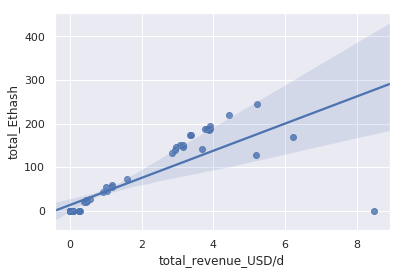

In [71]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

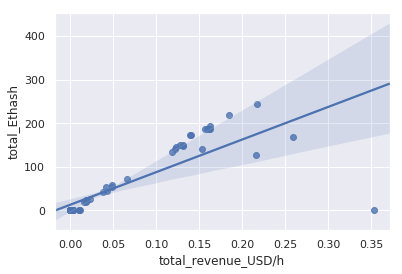

In [72]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

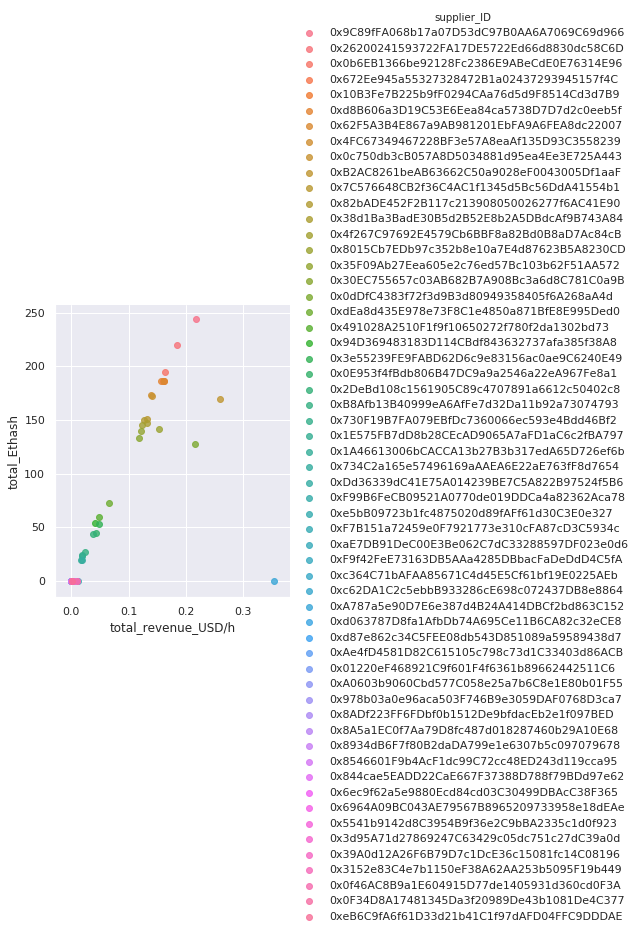

In [73]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [74]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,244.352,1.0,$5.21
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.579,2.0,$4.44
2,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,194.346,3.0,$3.91
3,0x672Ee945a55327328472B1a02437293945157f4C,186.411,3.0,$3.82
4,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,3.0,$3.90
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,2.0,$3.75
6,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,2.0,$3.87
7,0x4FC67349467228BF3e57A8eaAf135D93C3558239,172.870,1.0,$3.35
8,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.723,1.0,$3.38
9,0xB2AC8261beAB63662C50a9028eF0043005Df1aaF,169.359,2.0,$6.22


In [75]:
df13['total_revenue_USD/d'].sum()

88.101565326940815

In [76]:
df13['total_revenue_USD/d'].sum()

88.101565326940815

In [77]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'88.10'

In [78]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 88.10 USD/day is spent on the entire SONM platform.


# Run the same statistics for master_ID

In [79]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,23.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783
0x25158E6f8dD683d222E3785BA2294A319489084E,9.0,75.812000,91.988258,0.000,0.00000,17.5030,147.09400,244.352
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,11.943500,16.890660,0.000,5.97175,11.9435,17.91525,23.887
0x3370B966Dc1b93c52A124192690F837c3F66A0c1,2.0,26.754500,37.836577,0.000,13.37725,26.7545,40.13175,53.509
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731
0x416Af57F633e292b25976573a460d7C3200feD34,10.0,74.525800,96.212409,0.000,0.00000,0.0000,186.26175,186.411
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,4.0,4.951500,9.903000,0.000,0.00000,0.0000,4.95150,19.806


In [80]:
df20 = df.groupby('master_ID').describe()['Ethash']

In [81]:
df20.to_csv('mastereth.csv')

In [82]:
df21 = pd.read_csv('mastereth.csv')

In [83]:
df21['total_Ethash']= df21['count']*df21['mean']

In [84]:
df21.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
1,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,23.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783,297.079
3,0x25158E6f8dD683d222E3785BA2294A319489084E,9.0,75.812000,91.988258,0.000,0.00000,17.5030,147.09400,244.352,682.308
4,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,11.943500,16.890660,0.000,5.97175,11.9435,17.91525,23.887,23.887


In [85]:
df21[['master_ID','total_Ethash','count']]

,master_ID,total_Ethash,count
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,0.000,1.0
1,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,0.000,23.0
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,297.079,3.0
3,0x25158E6f8dD683d222E3785BA2294A319489084E,682.308,9.0
4,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,23.887,2.0
5,0x3370B966Dc1b93c52A124192690F837c3F66A0c1,53.509,2.0
6,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
7,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,10.0
8,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,19.806,4.0
9,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,11.0


In [86]:
df22 = df21[['master_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [87]:
df22.head()

,master_ID,total_Ethash,count
7,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,10.0
3,0x25158E6f8dD683d222E3785BA2294A319489084E,682.308,9.0
22,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.593,2.0
16,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,5.0
2,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,297.079,3.0


In [88]:
df22.to_csv('masterethash.csv', index = False)

In [89]:
df23 = pd.read_csv('masterethash.csv')

In [90]:
df23

,master_ID,total_Ethash,count
0,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,10.0
1,0x25158E6f8dD683d222E3785BA2294A319489084E,682.308,9.0
2,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.593,2.0
3,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,5.0
4,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,297.079,3.0
5,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,219.579,2.0
6,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,194.433,6.0
7,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
8,0xb08773F2De0f987178E5aeF09eB0B36b8E7A81C0,133.140,2.0
9,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,11.0


In [91]:
def total_master_revenue(address):
    return df[df.master_ID == address]['price_USD/h'].sum()

In [92]:
df23['total_revenue_USD/h'] = df23['master_ID'].apply(total_master_revenue)

In [93]:
df23['total_revenue_USD/d'] = df23['total_revenue_USD/h'] *24

In [94]:
df23['revenue_USD/d'] = df23['total_revenue_USD/d'].map('${:,.2f}'.format)

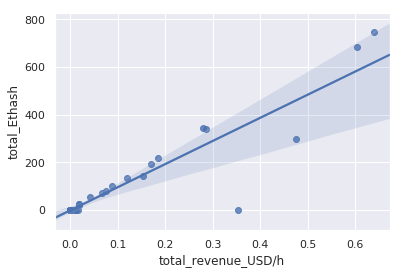

In [95]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df23)

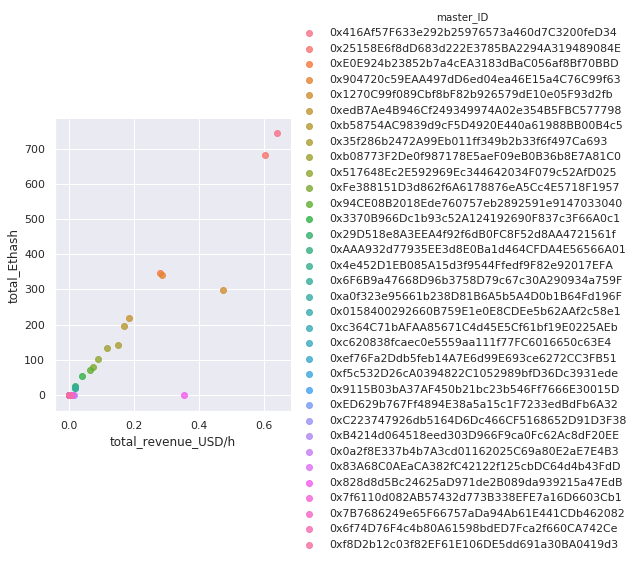

In [96]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df23, fit_reg=False, hue='master_ID', legend=True)

In [97]:
df23[['master_ID','total_Ethash','count','revenue_USD/d']]

,master_ID,total_Ethash,count,revenue_USD/d
0,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,10.0,$15.35
1,0x25158E6f8dD683d222E3785BA2294A319489084E,682.308,9.0,$14.46
2,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.593,2.0,$6.72
3,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,340.018,5.0,$6.85
4,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,297.079,3.0,$11.40
5,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,219.579,2.0,$4.44
6,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,194.433,6.0,$4.09
7,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
8,0xb08773F2De0f987178E5aeF09eB0B36b8E7A81C0,133.140,2.0,$2.85
9,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,11.0,$2.14


# Run the same statistics for consumers

In [98]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,148.970583,72.859635,0.000,145.58325,179.5340,186.37725,219.579
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731
0x417c92FbD944b125A578848DE44a4FD9132E0911,10.0,33.133700,15.485874,17.503,20.60800,25.2740,44.37050,59.101
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,76.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,6.0,143.963667,61.358009,53.305,128.21050,146.3830,150.00025,244.352
0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000


In [99]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [100]:
df10.to_csv('consumer.csv')

In [101]:
df11 = pd.read_csv('consumer.csv')

In [102]:
df11['total_Ethash']= df11['mean']*df11['count']

In [103]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783,297.079
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,148.970583,72.859635,0.000,145.58325,179.5340,186.37725,219.579,1787.647
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,10.0,33.133700,15.485874,17.503,20.60800,25.2740,44.37050,59.101,331.337
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,76.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,6.0,143.963667,61.358009,53.305,128.21050,146.3830,150.00025,244.352,863.782
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
8,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
9,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000


In [104]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [105]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [106]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [107]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [108]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783,297.079,0.475200,11.404800,$11.40
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,148.970583,72.859635,0.000,145.58325,179.5340,186.37725,219.579,1787.647,1.509125,36.219008,$36.22
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,10.0,33.133700,15.485874,17.503,20.60800,25.2740,44.37050,59.101,331.337,0.261042,6.265010,$6.27
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000,0.000000,$0.00


In [109]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,148.970583,72.859635,0.000,145.58325,179.5340,186.37725,219.579,1787.647,1.509125e+00,3.621901e+01,$36.22
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,6.0,143.963667,61.358009,53.305,128.21050,146.3830,150.00025,244.352,863.782,7.542708e-01,1.810250e+01,$18.10
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,10.0,33.133700,15.485874,17.503,20.60800,25.2740,44.37050,59.101,331.337,2.610421e-01,6.265010e+00,$6.27
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783,297.079,4.752000e-01,1.140480e+01,$11.40
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,1.530000e-01,3.672000e+00,$3.67
10,0xF92f61bEB70BF7785C090C05433Da04Cb86DD8A1,1.0,72.155000,NaN,72.155,72.15500,72.1550,72.15500,72.155,72.155,5.979594e-02,1.435103e+00,$1.44
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,76.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,7.299786e-02,1.751949e+00,$1.75
12,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,3.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,2.200000e-02,5.280000e-01,$0.53
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,6.220800e-10,1.492992e-08,$0.00


In [110]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [111]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,12.0,148.970583,72.859635,0.000,145.58325,179.5340,186.37725,219.579,1787.647,1.509125,36.219008,$36.22
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,6.0,143.963667,61.358009,53.305,128.21050,146.3830,150.00025,244.352,863.782,0.754271,18.102500,$18.10
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,10.0,33.133700,15.485874,17.503,20.60800,25.2740,44.37050,59.101,331.337,0.261042,6.265010,$6.27
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,3.0,99.026333,66.890505,22.576,75.14800,127.7200,137.25150,146.783,297.079,0.475200,11.404800,$11.40
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67


In [112]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
1,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,1787.647,12.0,$36.22
6,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,863.782,6.0,$18.10
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,331.337,10.0,$6.27
0,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,297.079,3.0,$11.40
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
10,0xF92f61bEB70BF7785C090C05433Da04Cb86DD8A1,72.155,1.0,$1.44
5,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0.000,76.0,$1.75
12,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,0.000,3.0,$0.53
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,2.0,$0.00
7,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,0.000,2.0,$0.00


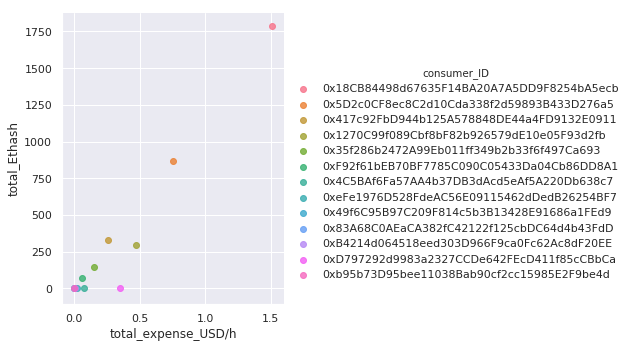

In [113]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [114]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,deal_ID,cryptonight_benchmark
7,"{""deal"":{""id"":""16814""","""benchmarks"":{""values"":[508",1143,2,512000000,67108864,1000000,1000000,1,6375342080,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x35F09Ab27Eea605e2c76ed57Bc103b62F51AA572,0.013608,17.503,0x25158E6f8dD683d222E3785BA2294A319489084E,16814,12
13,"{""deal"":{""id"":""16811""","""benchmarks"":{""values"":[506",1298,4,512000000,67108864,1000001,1000000,1,6368002048,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.018265,23.014,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,16811,8
15,"{""deal"":{""id"":""16810""","""benchmarks"":{""values"":[508",1230,4,512000000,67108864,1000001,1000000,1,6365904896,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1A46613006bCACCA13b27B3b317edA65D726ef6b,0.015634,19.806,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,16810,7
37,"{""deal"":{""id"":""15306""","""benchmarks"":{""values"":[501",1079,2,512000000,67108864,1000000,1000000,2,4232052736,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.018625,23.887,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,15306,9
56,"{""deal"":{""id"":""16465""","""benchmarks"":{""values"":[512",1507,4,512000000,67108864,1000001,1000000,2,8513388544,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x491028A2510F1f9f10650272f780f2da1302bd73,0.046155,59.101,0x517648Ec2E592969Ec344642034F079c52AfD025,16465,12
63,"{""deal"":{""id"":""16317""","""benchmarks"":{""values"":[512",1620,8,512000000,67108864,1000000,1000000,1,8511291392,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xB8Afb13B40999eA6AfFe7d32Da11b92a73074793,0.021213,26.661,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,16317,11
71,"{""deal"":{""id"":""15626""","""benchmarks"":{""values"":[506",1113,8,512000000,67108864,1000000,1000000,1,6368002048,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.015378,19.778,0x6F6B9a47668D96b3758D79c67c30A290934a759F,15626,12
99,"{""deal"":{""id"":""15802""","""benchmarks"":{""values"":[503",1108,2,512000000,67108864,1000000,1000000,2,8513388544,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x94D369483183D114CBdf843632737afa385f38A8,0.042142,53.509,0x3370B966Dc1b93c52A124192690F837c3F66A0c1,15802,15
104,"{""deal"":{""id"":""16815""","""benchmarks"":{""values"":[506",1526,8,512000000,67108864,1000000,1000000,2,4292050944,...,None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2DeBd108c1561905C89c4707891a6612c50402c8,0.034400,43.376,0x517648Ec2E592969Ec344642034F079c52AfD025,16815,12
108,"{""deal"":{""id"":""16034""","""benchmarks"":{""values"":[508",1846,12,512000000,67108864,1000000,1000000,2,6372196352,...,"""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0.035622,44.702,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,16034,17


In [115]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [116]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [117]:
df12[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
56,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x491028A2510F1f9f10650272f780f2da1302bd73,0x517648Ec2E592969Ec344642034F079c52AfD025,0.046155,59.101,"{""deal"":{""id"":""16465"""
99,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x94D369483183D114CBdf843632737afa385f38A8,0x3370B966Dc1b93c52A124192690F837c3F66A0c1,0.042142,53.509,"{""deal"":{""id"":""15802"""
108,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0E953f4fBdb806B47DC9a9a2546a22eA967Fe8a1,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,0.035622,44.702,"{""deal"":{""id"":""16034"""
104,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2DeBd108c1561905C89c4707891a6612c50402c8,0x517648Ec2E592969Ec344642034F079c52AfD025,0.034400,43.376,"{""deal"":{""id"":""16815"""
63,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xB8Afb13B40999eA6AfFe7d32Da11b92a73074793,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,0.021213,26.661,"{""deal"":{""id"":""16317"""
37,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,0.018625,23.887,"{""deal"":{""id"":""15306"""
13,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,0.018265,23.014,"{""deal"":{""id"":""16811"""
15,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1A46613006bCACCA13b27B3b317edA65D726ef6b,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0.015634,19.806,"{""deal"":{""id"":""16810"""
71,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0x6F6B9a47668D96b3758D79c67c30A290934a759F,0.015378,19.778,"{""deal"":{""id"":""15626"""
7,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x35F09Ab27Eea605e2c76ed57Bc103b62F51AA572,0x25158E6f8dD683d222E3785BA2294A319489084E,0.013608,17.503,"{""deal"":{""id"":""16814"""


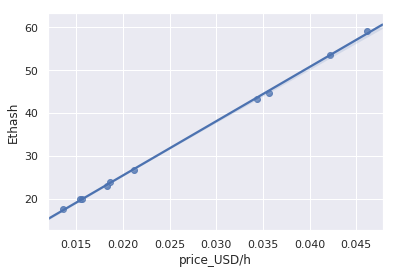

In [118]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

In [119]:
from scipy import stats

In [120]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df12.Ethash,df12['price_USD/h'])

In [121]:
slope

0.00078800863345940579

In [122]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")

Current profitability (USD/h) = 0.000788008633459 * Ethash(Mh/s)


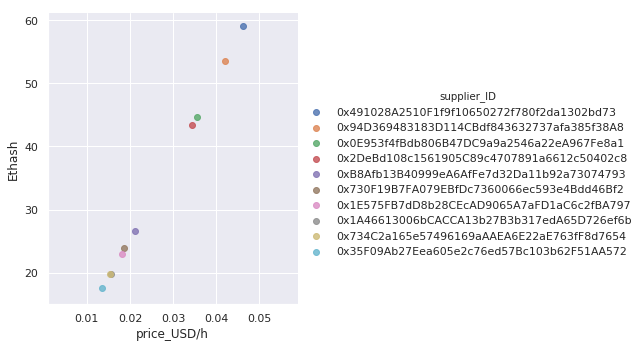

In [123]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

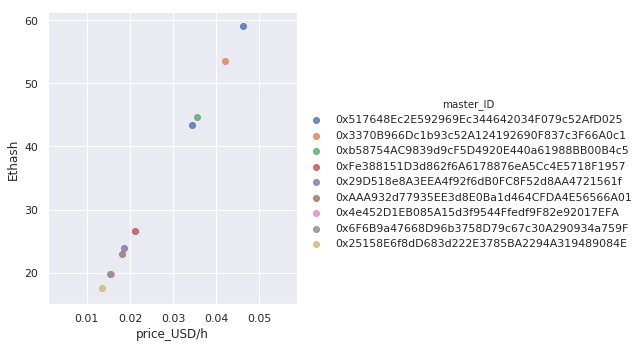

In [124]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='master_ID', legend=True)

In [125]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [126]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


Real-time total Ethash rate of the entire SONM platform is 3493.723 Mh/s.
At this moment, total 88.10 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 10 deals.
GPU-Connor currently pays 6.27 USD/day.
GPU-Connor currently mines ETH with 331.337 Mh/s hashrate.
There are 34 unique suppliers at this moment.
There are 17 unique GPU sppliers at this moment.
There are 17 unique CPU sppliers at this moment.
There are 13 unique consumers at this moment.
Currenlty, there are total 120 deals.
Of which 32 deals contain GPU.
And 88 deals are CPU only.


# profitablility calculator

GPU card  EThash  SONM profitability
Nvida GTX 1050 TI   15 Mh/s  0.0127 USD/h 
Nvida GTX 1060    24 Mh/s  0.0201 USD/h
Nvida GTX 1070 TI   32 Mh/s  0.0274 USD/h
Nvida GTX 1080    27 Mh/s  0.0231 USD/h
Nvida GTX 1080 TI   37 Mh/s  0.0317 USD/h
Nvida GTX TITAN   40 Mh/s  0.0343 USD/h
Nvida GTX 1080 (with Pill) 40Mh/s 0.0343 USD/h
Nvida GTX 1080 TI (with Pill) 50 Mh/s 0.0429 USD/h

In [127]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")
print(" ")
print("GPU card                EThash     SONM profitability")
print("Nvida GTX 1050 TI       15 Mh/s    " + str("{:.2f}".format(slope*15*24))+ " USD/day")
print("Nvida GTX 1060          24 Mh/s    " + str("{:.2f}".format(slope*24*24))+ " USD/day")
print("Nvida GTX 1070 TI       32 Mh/s    " + str("{:.2f}".format(slope*32*24))+ " USD/day")
print("Nvida GTX 1080          27 Mh/s    " + str("{:.2f}".format(slope*27*24))+ " USD/day")
print("Nvida GTX 1080 TI       37 Mh/s    " + str("{:.2f}".format(slope*37*24))+ " USD/day")
print("Nvida GTX TITAN         40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 +pill    40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 TI +pill 50 Mh/s    " + str("{:.2f}".format(slope*50*24))+ " USD/day")






Current profitability (USD/h) = 0.000788008633459 * Ethash(Mh/s)
 
GPU card                EThash     SONM profitability
Nvida GTX 1050 TI       15 Mh/s    0.28 USD/day
Nvida GTX 1060          24 Mh/s    0.45 USD/day
Nvida GTX 1070 TI       32 Mh/s    0.61 USD/day
Nvida GTX 1080          27 Mh/s    0.51 USD/day
Nvida GTX 1080 TI       37 Mh/s    0.70 USD/day
Nvida GTX TITAN         40 Mh/s    0.76 USD/day
Nvida GTX 1080 +pill    40 Mh/s    0.76 USD/day
Nvida GTX 1080 TI +pill 50 Mh/s    0.95 USD/day


# CPU connor

In [128]:
def benchmark(content):
    return int(content[content.find('[')+1:])

In [129]:
df['benchmark'] = df[1].apply(benchmark)

In [130]:
df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7']

,0,1,2,3,4,5,6,7,8,9,...,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,deal_ID,cryptonight_benchmark,benchmark
0,"{""deals"":[{""deal"":{""id"":""16777""","""benchmarks"":{""values"":[3373",1383,4,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xA0603b9060Cbd577C058e25a7b6C8e1E80b01F55,0.002421,0.0,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16777,121,3373
1,"{""deal"":{""id"":""16776""","""benchmarks"":{""values"":[1684",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000404,0.0,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16776,21,1684
3,"{""deal"":{""id"":""16775""","""benchmarks"":{""values"":[846",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000202,0.0,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16775,11,846
4,"{""deal"":{""id"":""16577""","""benchmarks"":{""values"":[9701",1753,8,64000000,150000000,1000001,1000000,0,0,...,None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0.003906,0.0,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,16577,191,9701
5,"{""deal"":{""id"":""16774""","""benchmarks"":{""values"":[2522",1090,8,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xDd36339dC41E75A014239BE7C5A822B97524f5B6,0.000605,0.0,0x0a2f8E337b4b7A3cd01162025C69a80E2aE7E4B3,16774,31,2522
6,"{""deal"":{""id"":""16574""","""benchmarks"":{""values"":[504",1140,2,64000000,150000000,1000001,1000000,0,0,...,None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x38d1Ba3BadE30B5d2B52E8b2A5DBdcAf9B743A84,0.000204,0.0,0x25158E6f8dD683d222E3785BA2294A319489084E,16574,14,504
8,"{""deal"":{""id"":""16573""","""benchmarks"":{""values"":[745",1140,2,64000000,150000000,1000001,1000000,0,0,...,None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x38d1Ba3BadE30B5d2B52E8b2A5DBdcAf9B743A84,0.000408,0.0,0x25158E6f8dD683d222E3785BA2294A319489084E,16573,21,745
9,"{""deal"":{""id"":""16529""","""benchmarks"":{""values"":[2318",1507,4,64000000,150000000,1000001,1000000,0,0,...,None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x491028A2510F1f9f10650272f780f2da1302bd73,0.001034,0.0,0x517648Ec2E592969Ec344642034F079c52AfD025,16529,51,2318
11,"{""deal"":{""id"":""16812""","""benchmarks"":{""values"":[4059",1298,4,64000000,150000000,1000001,1000000,0,0,...,None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.001200,0.0,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,16812,61,4059
12,"{""deal"":{""id"":""16813""","""benchmarks"":{""values"":[954",1461,4,64000000,150000000,1000000,1000000,0,0,...,"""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x6ec9f62a5e9880Ecd84cd03C30499DBAcC38F365,0.000200,0.0,0xa0f323e95661b238D81B6A5b5A4D0b1B64Fd196F,16813,11,954


In [158]:
df_cpu = df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7'].sort_values('cryptonight_benchmark', ascending = False)

In [159]:
df_cpu['price_USD/h'].sum()*24

1.7519487472116579

In [160]:
len(df_cpu)

76

In [161]:
df_cpu['cpu'] = df_cpu[3].astype(int)

In [162]:
df_cpu['total_cpu_power'] = df_cpu['cpu']*df_cpu['benchmark']

In [163]:
df_cpu['cpu_multi']=df_cpu[2].astype(int)

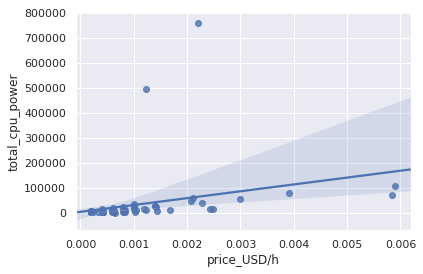

In [164]:
sns.regplot( y="total_cpu_power", x="price_USD/h", data=df_cpu)

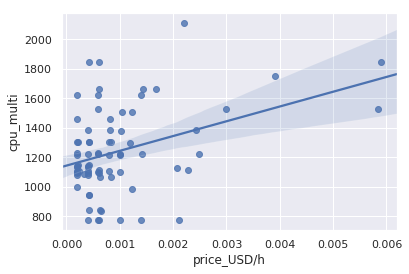

In [165]:
sns.regplot( y="cpu_multi", x="price_USD/h", data=df_cpu)

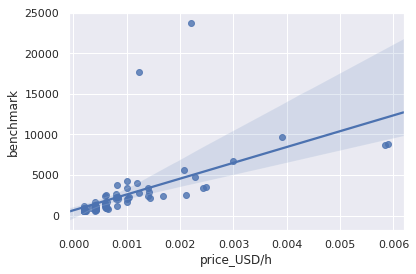

In [166]:
sns.regplot( y="benchmark", x="price_USD/h", data=df_cpu)

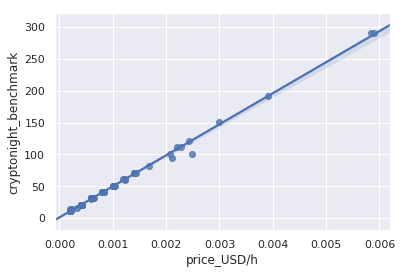

In [167]:
sns.regplot( y="cryptonight_benchmark", x="price_USD/h", data=df_cpu)

In [171]:
df_cpu[['deal_ID', 'price_USD/h','cryptonight_benchmark']].head(10)

,deal_ID,price_USD/h,cryptonight_benchmark
93,16545,0.005902,291
87,16725,0.005844,291
4,16577,0.003906,191
103,16816,0.002999,151
0,16777,0.002421,121
66,16849,0.002200,111
68,16554,0.002274,111
106,16538,0.002077,101
111,15042,0.002480,101
110,15023,0.002118,95


In [172]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


print('CPU-Connor currently has '+ str(len(df_cpu)) + ' deals.')

print('CPU-Connor currently pays ' + str("{:.2f}".format(df_cpu['price_USD/h'].sum()*24)) + " USD/day.") 


Real-time total Ethash rate of the entire SONM platform is 3493.723 Mh/s.
At this moment, total 88.10 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 10 deals.
GPU-Connor currently pays 6.27 USD/day.
GPU-Connor currently mines ETH with 331.337 Mh/s hashrate.
There are 34 unique suppliers at this moment.
There are 17 unique GPU sppliers at this moment.
There are 17 unique CPU sppliers at this moment.
There are 13 unique consumers at this moment.
Currenlty, there are total 120 deals.
Of which 32 deals contain GPU.
And 88 deals are CPU only.
CPU-Connor currently has 76 deals.
CPU-Connor currently pays 1.75 USD/day.


# My deals

0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb

In [141]:
df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

,0,1,2,3,4,5,6,7,8,9,...,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,deal_ID,cryptonight_benchmark,benchmark
16,"{""deal"":{""id"":""14033""","""benchmarks"":{""values"":[516",1301,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.162020,186.366,0x416Af57F633e292b25976573a460d7C3200feD34,14033,10,516
34,"{""deal"":{""id"":""2040""","""benchmarks"":{""values"":[824",788,1,800000000,10000000000,500000000,300000000,0,0,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0.000480,0.000,0xf5c532D26cA0394822C1052989bfD36Dc3931ede,2040,0,824
47,"{""deal"":{""id"":""15924""","""benchmarks"":{""values"":[516",960,2,512000000,67108864,1000000,1000000,6,7874609152,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.140768,172.723,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,15924,5,516
48,"{""deal"":{""id"":""15922""","""benchmarks"":{""values"":[519",1136,2,512000000,67108864,1000000,1000000,8,8513388544,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,0.162200,194.346,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,15922,12,519
51,"{""deal"":{""id"":""15921""","""benchmarks"":{""values"":[518",998,2,512000000,67108864,1000001,1000000,6,7870308352,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.139410,172.870,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,15921,5,518
67,"{""deal"":{""id"":""12657""","""benchmarks"":{""values"":[6045",2111,32,64000000,67108864,1000000,1000000,0,0,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.004824,0.000,0x94CE08B2018Ede760757eb2892591e9147033040,12657,28,6045
72,"{""deal"":{""id"":""16842""","""benchmarks"":{""values"":[522",1528,8,512000000,67108864,1000000,1000000,5,8513388544,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30EC755657c03AB682B7A908Bc3a6d8C781C0a9B,0.113007,133.140,0xb08773F2De0f987178E5aeF09eB0B36b8E7A81C0,16842,18,522
74,"{""deal"":{""id"":""15322""","""benchmarks"":{""values"":[521",1302,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.160431,186.198,0x416Af57F633e292b25976573a460d7C3200feD34,15322,11,521
78,"{""deal"":{""id"":""15317""","""benchmarks"":{""values"":[521",1300,2,512000000,67108864,1000000,1000000,7,8513388544,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0.158666,186.411,0x416Af57F633e292b25976573a460d7C3200feD34,15317,10,521
85,"{""deal"":{""id"":""16840""","""benchmarks"":{""values"":[522",1103,2,512000000,67108864,1000001,1000001,10,3163553792,...,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.184221,219.579,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,16840,10,522


In [142]:
df32 = df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

In [143]:
df32 = df32.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [144]:
df32[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
85,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.184221,219.579,"{""deal"":{""id"":""16840"""
48,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0b6EB1366be92128Fc2386E9ABeCdE0E76314E96,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,0.162200,194.346,"{""deal"":{""id"":""15922"""
78,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0x416Af57F633e292b25976573a460d7C3200feD34,0.158666,186.411,"{""deal"":{""id"":""15317"""
16,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0x416Af57F633e292b25976573a460d7C3200feD34,0.162020,186.366,"{""deal"":{""id"":""14033"""
90,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0x416Af57F633e292b25976573a460d7C3200feD34,0.155553,186.283,"{""deal"":{""id"":""16837"""
74,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0x416Af57F633e292b25976573a460d7C3200feD34,0.160431,186.198,"{""deal"":{""id"":""15322"""
51,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,0.139410,172.870,"{""deal"":{""id"":""15921"""
47,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,0.140768,172.723,"{""deal"":{""id"":""15924"""
100,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x82bADE452F2B117c213908050026277f6AC41E90,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,0.127545,149.731,"{""deal"":{""id"":""13326"""
72,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30EC755657c03AB682B7A908Bc3a6d8C781C0a9B,0xb08773F2De0f987178E5aeF09eB0B36b8E7A81C0,0.113007,133.140,"{""deal"":{""id"":""16842"""


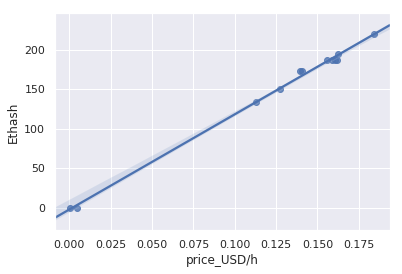

In [145]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)

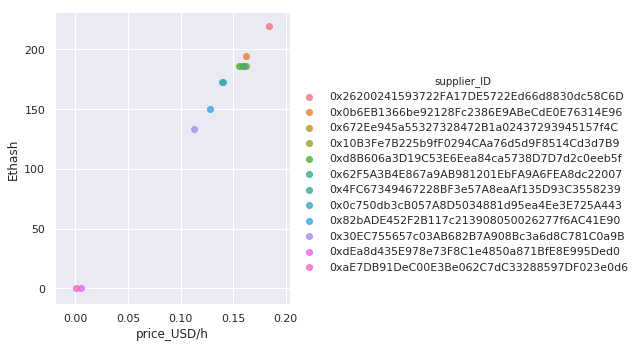

In [146]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='supplier_ID', legend=True)

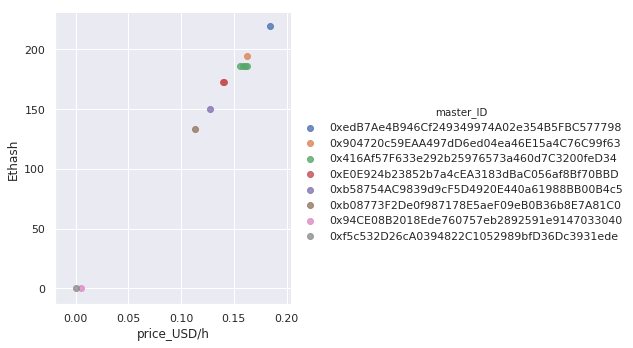

In [147]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='master_ID', legend=True)

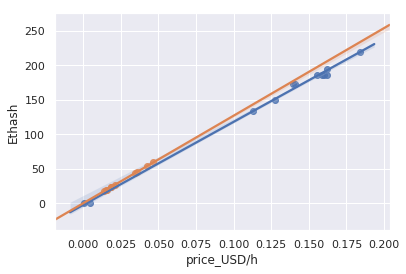

In [148]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

# 0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5

In [149]:
df42 = df[df.consumer_ID == '0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5']

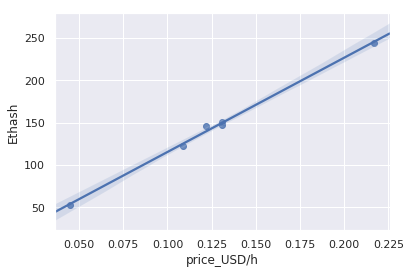

In [150]:
sns.regplot( y="Ethash", x="price_USD/h", data=df42)

In [151]:
df42 = df42.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [152]:
df42[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
73,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x9C89fFA068b17a07D53dC97B0AA6A7069C69d966,0x25158E6f8dD683d222E3785BA2294A319489084E,0.216904,244.352,"{""deal"":{""id"":""16220"""
80,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x7C576648CB2f36C4AC1f1345d5Bc56DdA41554b1,0x25158E6f8dD683d222E3785BA2294A319489084E,0.131052,150.969,"{""deal"":{""id"":""16214"""
10,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x38d1Ba3BadE30B5d2B52E8b2A5DBdcAf9B743A84,0x25158E6f8dD683d222E3785BA2294A319489084E,0.130731,147.094,"{""deal"":{""id"":""16572"""
89,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x4f267C97692E4579Cb6BBF8a82Bd0B8aD7Ac84cB,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,0.121683,145.672,"{""deal"":{""id"":""16836"""
21,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x35F09Ab27Eea605e2c76ed57Bc103b62F51AA572,0x25158E6f8dD683d222E3785BA2294A319489084E,0.108984,122.390,"{""deal"":{""id"":""16806"""
2,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x3e55239FE9FABD62D6c9e83156ac0ae9C6240E49,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,0.044918,53.305,"{""deal"":{""id"":""16578"""


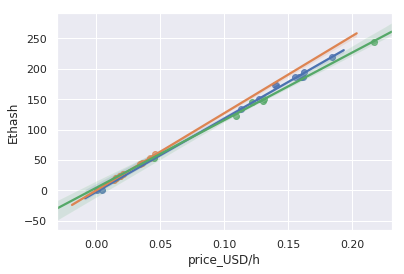

In [153]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)
sns.regplot( y="Ethash", x="price_USD/h", data=df12)
sns.regplot( y="Ethash", x="price_USD/h", data=df42)


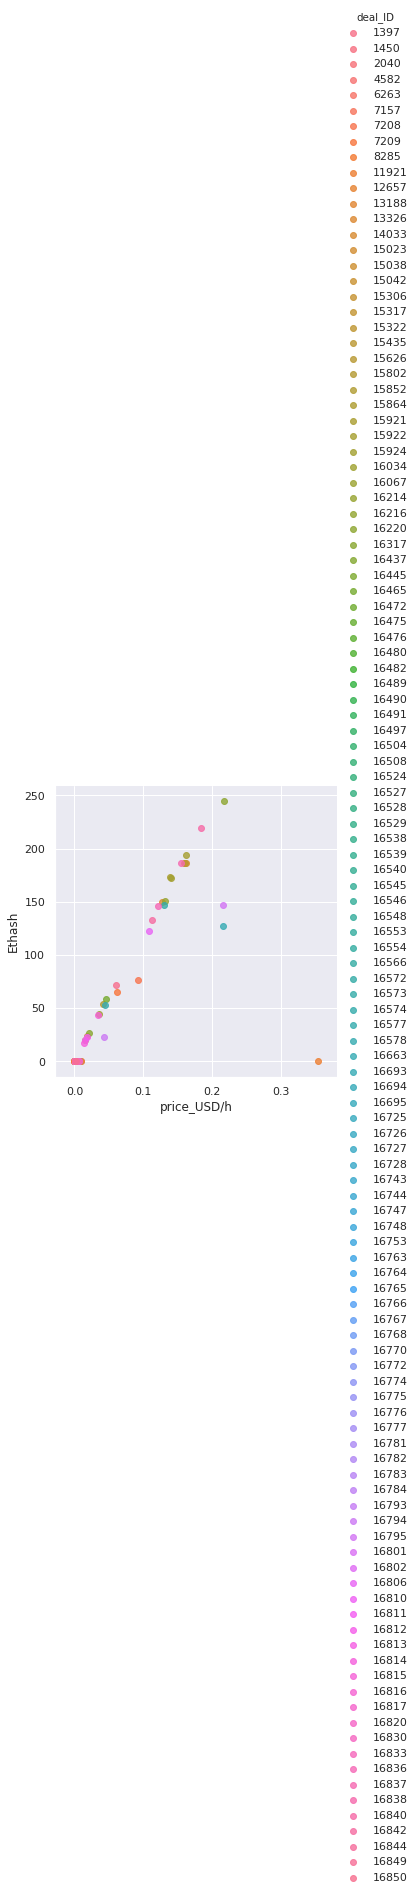

In [154]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df, fit_reg=False, hue='deal_ID', legend=True)